-----
## **Chapter 4. Training Models**
----

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### **Linear Regression**  <br>

En este capítulo comenzaremos por mirar elModelo de regresión lineal, uno de los modelos más simples que existen. Discutiremos dos formas muy diferentes de entrenarlo:

* Usar una ecuación directa de “forma cerrada” que calcula directamente los parámetros del modelo que mejor se ajustan al modelo al conjunto de entrenamiento (es decir, los parámetros del modelo que minimizan la función de costo sobre el conjunto de entrenamiento).

* Usando un enfoque de optimización iterativo llamadoGradient Descent (GD) que ajusta gradualmente los parámetros del modelo para minimizar la función de costo sobre el conjunto de entrenamiento, y eventualmente converge al mismo conjunto de parámetros que el primer método. Veremos algunas variantes de Gradient Descent que usaremos una y otra vez cuando estudiemos las redes neuronales en la Parte II : GD por lotes, GD por mini lotes y GD estocástico.

In [ ]:
X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

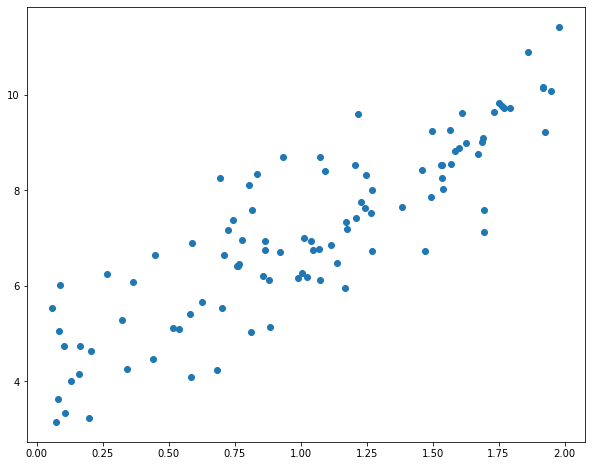

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.show()

In [ ]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

La función que usamos para generar los datos es y = 4 + 3 x 1 + ruido gaussiano. Veamos qué encontró la ecuación:

In [ ]:
theta_best

array([[4.06674651],
       [2.96915888]])

Ahora podemos hacer predicciones usando θˆ:

In [ ]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)

In [ ]:
y_predict

array([[ 4.06674651],
       [10.00506427]])

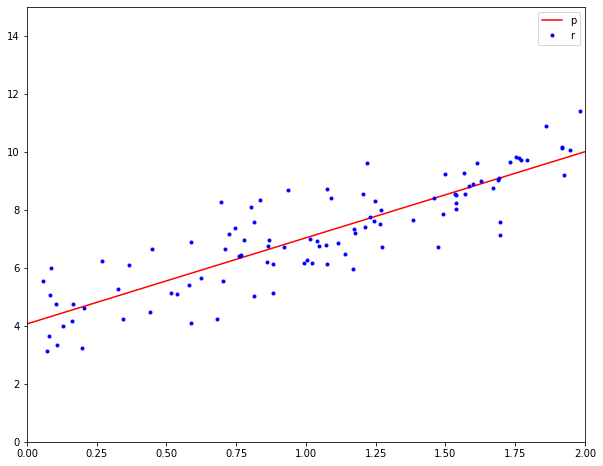

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.legend('predict')
plt.show()

Ejecutando La regresión lineal con Scikit-Learn es simple:

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.intercept_

array([4.06674651])

In [ ]:
model.coef_

array([[2.96915888]])

In [ ]:
model.predict(X_new)

array([[ 4.06674651],
       [10.00506427]])

In [ ]:
np.linalg.pinv(X_b)@y

array([[4.06674651],
       [2.96915888]])

Este enfoque es más eficiente que calcular la ecuación normal, además de que maneja bien los casos extremos: de hecho, la ecuación normal puede no funcionar si la matriz X ⊺ X no es invertible (es decir, singular), como si m < n o si alguna las características son redundantes, pero la pseudoinversa siempre está definida.


**Advertencia:** Tanto la ecuación normal como el enfoque de SVD se vuelven muy lentos cuando el número de características aumenta (por ejemplo, 100.000). En el lado positivo, ambos son lineales con respecto al número de instancias en el conjunto de entrenamiento (son O ( m )), por lo que manejan grandes conjuntos de entrenamiento de manera eficiente, siempre que puedan caber en la memoria.

Ahora veremos una forma muy diferente de entrenar un modelo de regresión lineal, que se adapta mejor a los casos en los que hay una gran cantidad de características o demasiadas instancias de entrenamiento para caber en la memoria.

### **Gradient Descent**

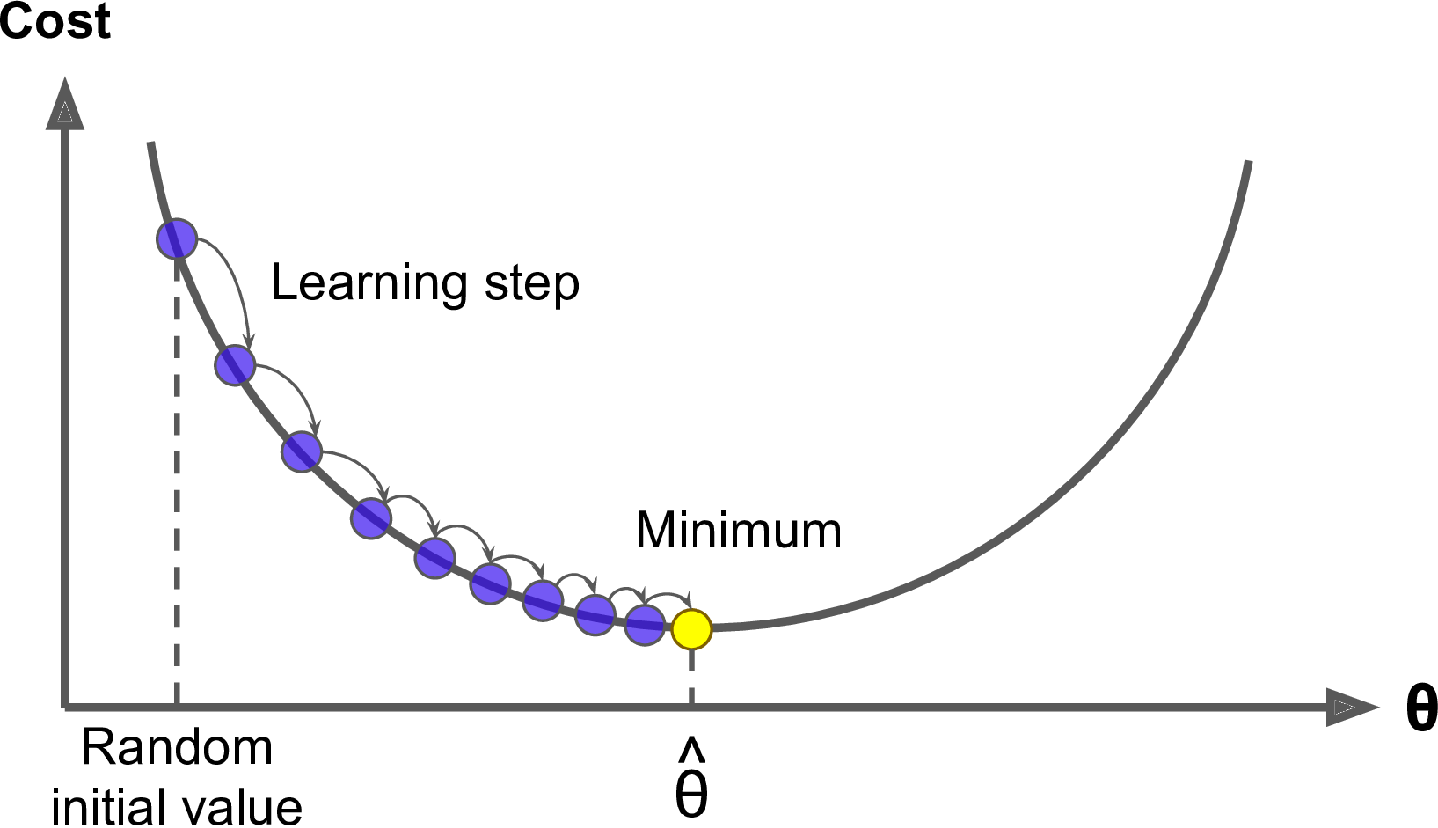

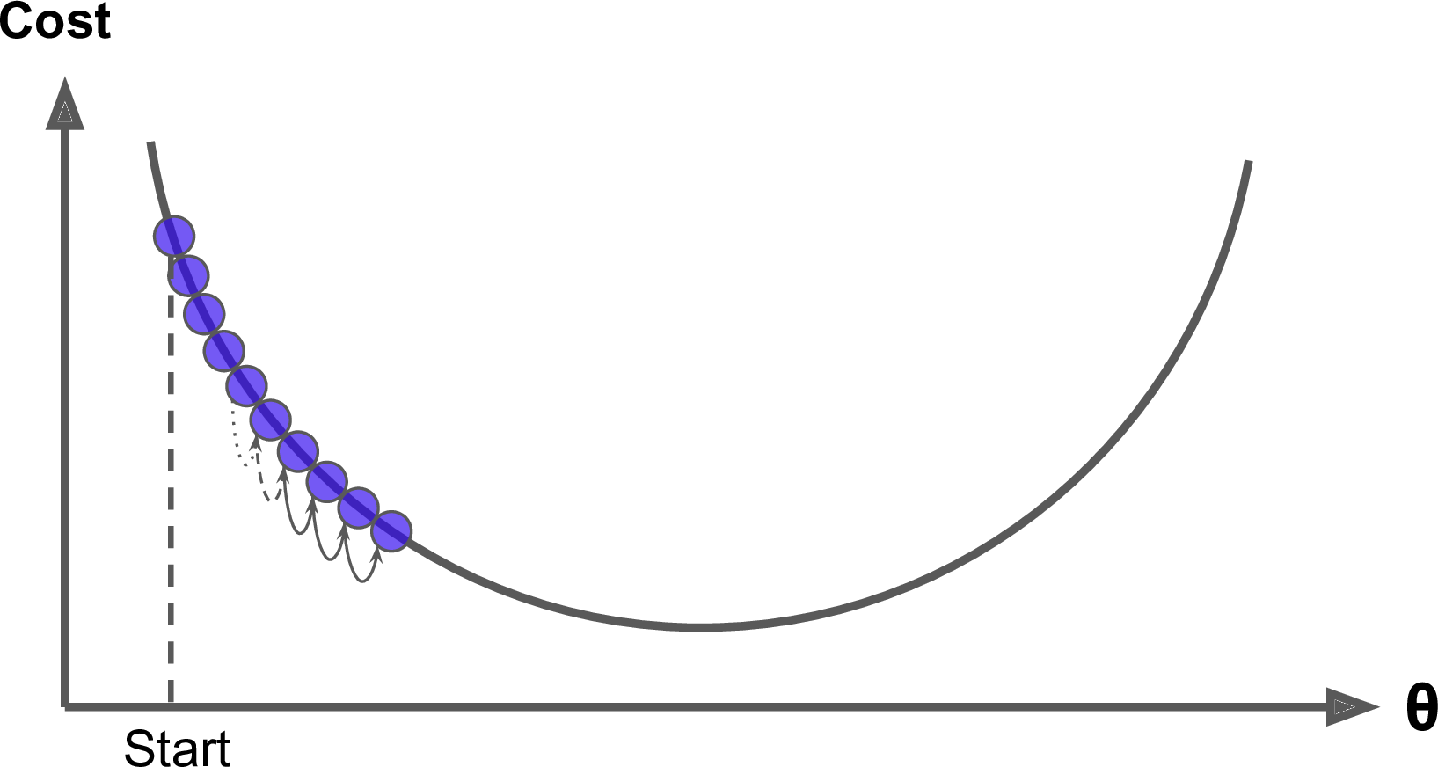

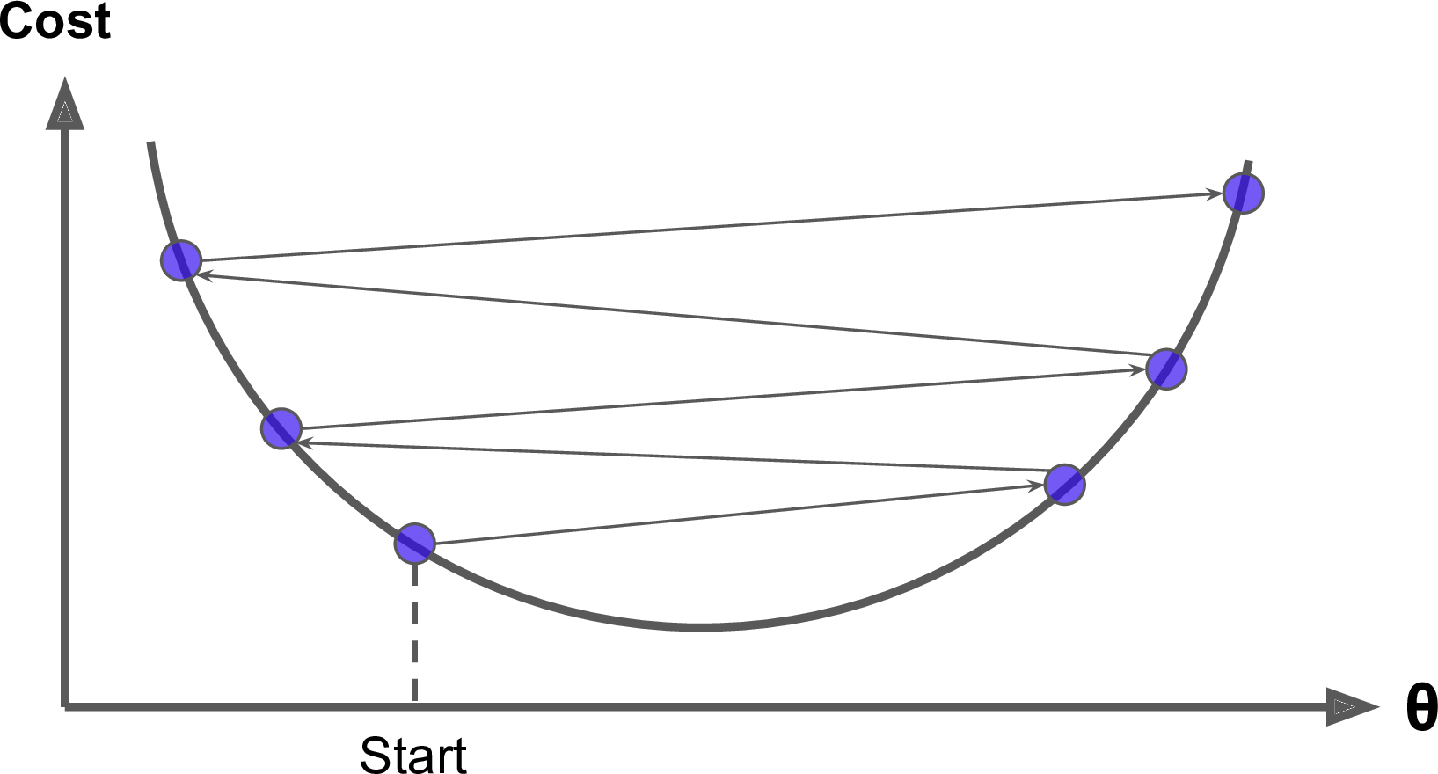

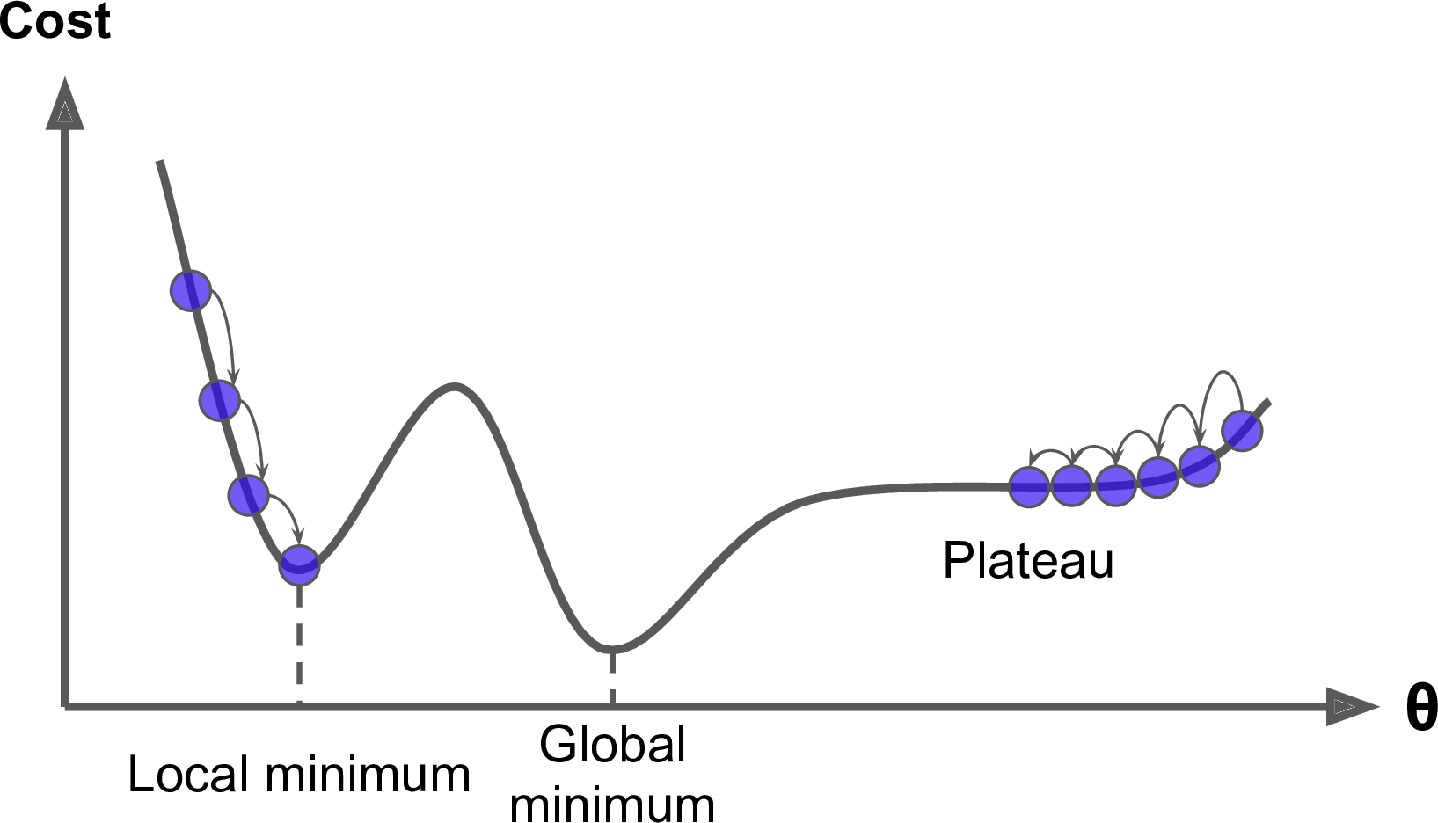

**Advertencia:** Al usar Gradient Descent, debe asegurarse de que todas las características tengan una escala similar (por ejemplo, usando la StandardScalerclase de Scikit-Learn ), o de lo contrario, la convergencia llevará mucho más tiempo.

### **Batch Gradient Descent**

Tenga en cuenta que esta fórmula implica cálculos sobre el conjunto de entrenamiento completo X , en cada paso de **Gradient Descent**. Es por eso que el algoritmo se llama **Batch Gradient Descent** : utiliza todo el lote de datos de entrenamiento en cada paso.(en realidad, Full Gradient Descent probablemente sería un mejor nombre). Como resultado, es terriblemente lento en conjuntos de entrenamiento muy grandes (pero veremos algoritmos de Gradient Descent mucho más rápidos en breve). Sin embargo, **Gradient Descent** se adapta bien al número de características; entrenar un modelo de regresión lineal cuando hay cientos de miles de entidades es mucho más rápido con el descenso de gradiente que con la ecuación normal o la descomposición de **SVD**.

Veamos una implementación rápida de este algoritmo:

In [ ]:
eta = 0.1
n_iter = 1000
m = 100

In [ ]:
theta = np.random.randn(2,1) #random inicialization

In [ ]:
for iteration in range(n_iter):
  gradient = 2/m * X_b.T @ ((X_b @ theta) - y)
  theta = theta - eta * gradient

In [ ]:
theta

array([[4.06674651],
       [2.96915888]])

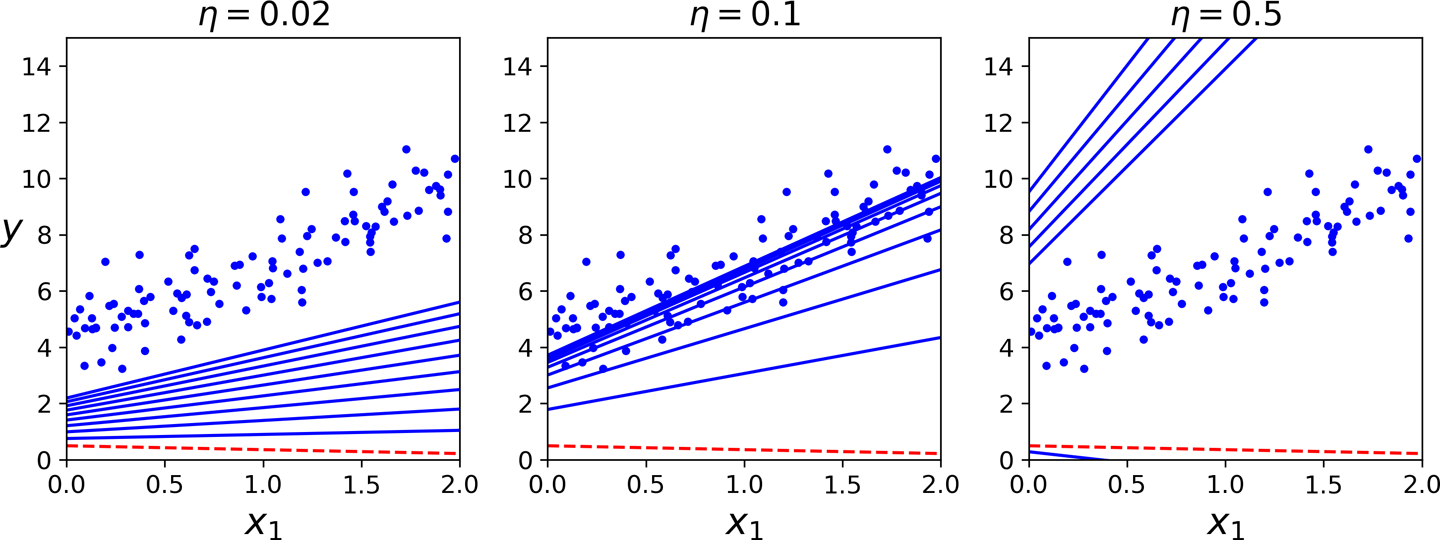

A la izquierda, la tasa de aprendizaje es demasiado baja: el algoritmo eventualmente alcanzará la solución, pero llevará mucho tiempo. En el medio, la tasa de aprendizaje parece bastante buena: en solo unas pocas iteraciones, ya ha convergido a la solución. A la derecha, la tasa de aprendizaje es demasiado alta: el algoritmo diverge, salta por todos lados y, de hecho, se aleja cada vez más de la solución en cada paso.

### **Stochastic Gradient Descent**

El principal problema de **Batch Gradient Descent** es el hecho de que utiliza todo el conjunto de entrenamiento para calcular los gradientes en cada paso, lo que lo hace muy lento cuando el conjunto de entrenamiento es grande. En el extremo opuesto, **Stochastic Gradient Descent** elige una instancia aleatoria en el conjunto de entrenamiento en cada paso y calcula los gradientes basándose solo en esa instancia única. Obviamente, trabajar en una sola instancia a la vez hace que el algoritmo sea mucho más rápido porque tiene muy pocos datos para manipular en cada iteración. También hace posible entrenar en grandes conjuntos de entrenamiento, ya que solo una instancia necesita estar en la memoria en cada iteración (Stochastic GD se puede implementar como un algoritmo fuera del núcleo).

Por otro lado, debido a su naturaleza estocástica (es decir, aleatoria), este algoritmo es mucho menos regular que **Batch Gradient Descent**: en lugar de disminuir suavemente hasta alcanzar el mínimo, la función de costo rebotará hacia arriba y hacia abajo, disminuyendo solo en promedio . Con el tiempo, terminará muy cerca del mínimo, pero una vez que llegue allí, continuará rebotando y nunca se asentará (consulte la Figura 4-9 ). Entonces, una vez que el algoritmo se detiene, los valores finales de los parámetros son buenos, pero no óptimos.

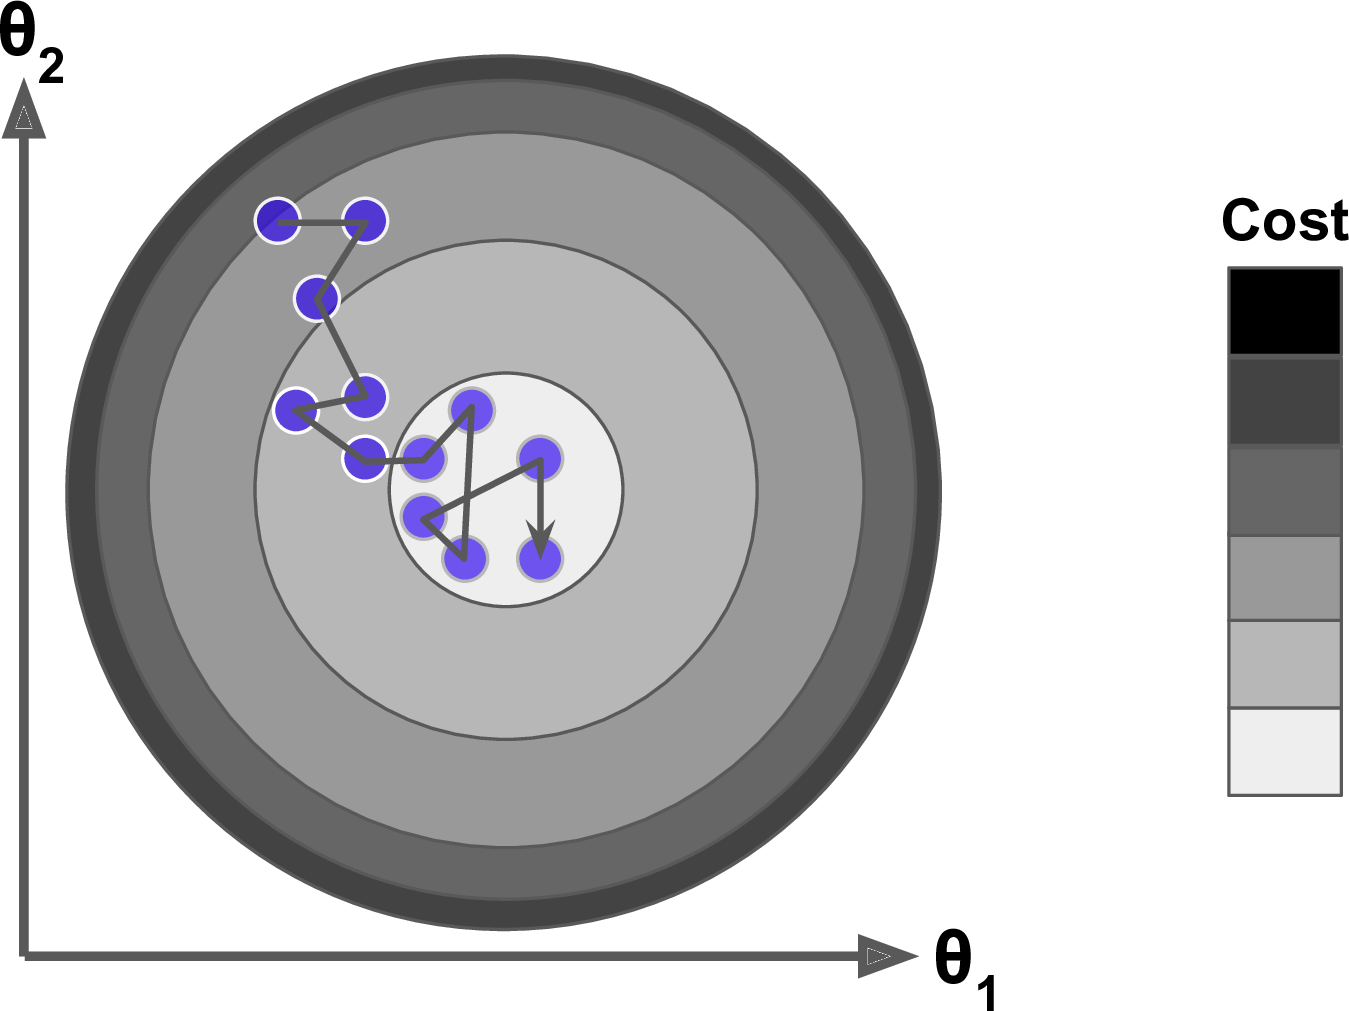

Por lo tanto, la aleatoriedad es buena para escapar de los óptimos locales, pero mala porque significa que el algoritmo nunca puede establecerse en el mínimo. Una solución a este dilema es reducir gradualmente la tasa de aprendizaje. Los pasos comienzan siendo grandes (lo que ayuda a avanzar rápidamente y escapar de los mínimos locales), luego se vuelven cada vez más pequeños, lo que permite que el algoritmo se establezca en el mínimo global. El proceso es similar al recocido simulado , un algoritmo inspirado en el proceso de la metalurgia del recocido, donde el metal fundido se enfría lentamente. losLa función que determina la tasa de aprendizaje en cada iteración se denomina programa de aprendizaje . Si la tasa de aprendizaje se reduce demasiado rápido, puede quedarse atascado en un mínimo local o incluso terminar congelado a la mitad del mínimo. Si la tasa de aprendizaje se reduce demasiado lentamente, puede saltar alrededor del mínimo durante mucho tiempo y terminar con una solución subóptima si detiene el entrenamiento demasiado pronto.

Este código implementa el descenso de gradiente estocástico usando un programa de aprendizaje simple:

In [ ]:
n_epochs = 50
t0 , t1 = 5,50 #learning schedule hyperparameters

In [ ]:
def learning_schedule(t):
  return t0 / (t1 + t)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi = y[random_index : random_index + 1]
    gradients = 2 * xi.T @ ((xi @ theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients



Por convención iteramos por rondas de m iteraciones; cada ronda se llama época . Si bien el código **Batch Gradient Descent** se repitió 1000 veces en todo el conjunto de entrenamiento, este código pasa por el conjunto de entrenamiento solo 50 veces y llega a una solución bastante buena:

In [ ]:
theta

array([[4.02901083],
       [2.95731201]])

Al utilizar el **descenso de gradiente estocástico**, las instancias de entrenamiento deben ser independientes y distribuidas de forma idéntica (IID) para garantizar que los parámetros se acerquen al óptimo global, en promedio. Una forma sencilla de garantizar esto es barajar las instancias durante el entrenamiento (por ejemplo, seleccionar cada instancia al azar o mezclar el conjunto de entrenamiento al comienzo de cada época). Si no mezcla las instancias, por ejemplo, si las instancias están ordenadas por etiqueta, entonces **SGD** comenzará optimizando para una etiqueta, luego la siguiente, y así sucesivamente, y no se acercará al mínimo global.

Para realizar una regresión lineal usando **SGD estocástico** con Scikit-Learn, puede usar la **SGD Regressor** clase, que por defecto optimiza la función de costo de error al cuadrado. El siguiente código se ejecuta durante un máximo de 1000 épocas o hasta que la pérdida se reduce en menos de 0,001 durante una época ( max_iter=1000, tol=1e-3). Comienza con una tasa de aprendizaje de 0.1 ( eta0=0.1), utilizando el programa de aprendizaje predeterminado (diferente al anterior). Por último, no utiliza ninguna regularización ( penalty=None):

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgd = SGDRegressor(max_iter=1000, tol=0.001, penalty=None, eta0=0.1)

In [ ]:
sgd.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd.intercept_

array([3.87795385])

In [ ]:
sgd.coef_

array([2.88644574])

### **Mini-batch Gradient Descent**

Es fácil de entender una vez que se conoce el descenso de gradiente por lotes y estocástico: en cada paso, en lugar de calcular los gradientes en función del conjunto de entrenamiento completo (como en GD por lotes) o en una sola instancia (como en GD estocástico), Mini- GD por lotes calcula los gradientes en pequeños conjuntos aleatorios de instancias llamados mini-lotes . La principal ventaja de **Mini-batch GD** sobre **Stochastic GD** es que puede obtener un aumento del rendimiento de la optimización del hardware de las operaciones matriciales, especialmente cuando se utilizan GPU. <br>
El progreso del algoritmo en el espacio de parámetros es menos errático que con **Stochastic GD**, especialmente con mini-lotes bastante grandes. Como resultado, el GD de mini lotes terminará caminando un poco más cerca del mínimo que el GD estocástico, pero puede ser más difícil para él escapar de los mínimos locales (en el caso de problemas que sufren de mínimos locales, a diferencia de la regresión lineal ). La figura 4-11 muestra las rutas tomadas por los tres algoritmos de descenso de gradiente en el espacio de parámetros durante el entrenamiento. Todos terminan cerca del mínimo, pero el camino de Batch GD en realidad se detiene en el mínimo, mientras que Stochastic GD y Mini-batch GD continúan caminando. Sin embargo, no olvide que Batch GD requiere mucho tiempo para dar cada paso, y **Stochastic GD** y **Mini-batch GD** también alcanzarían el mínimo si utilizara un buen programa de aprendizaje.

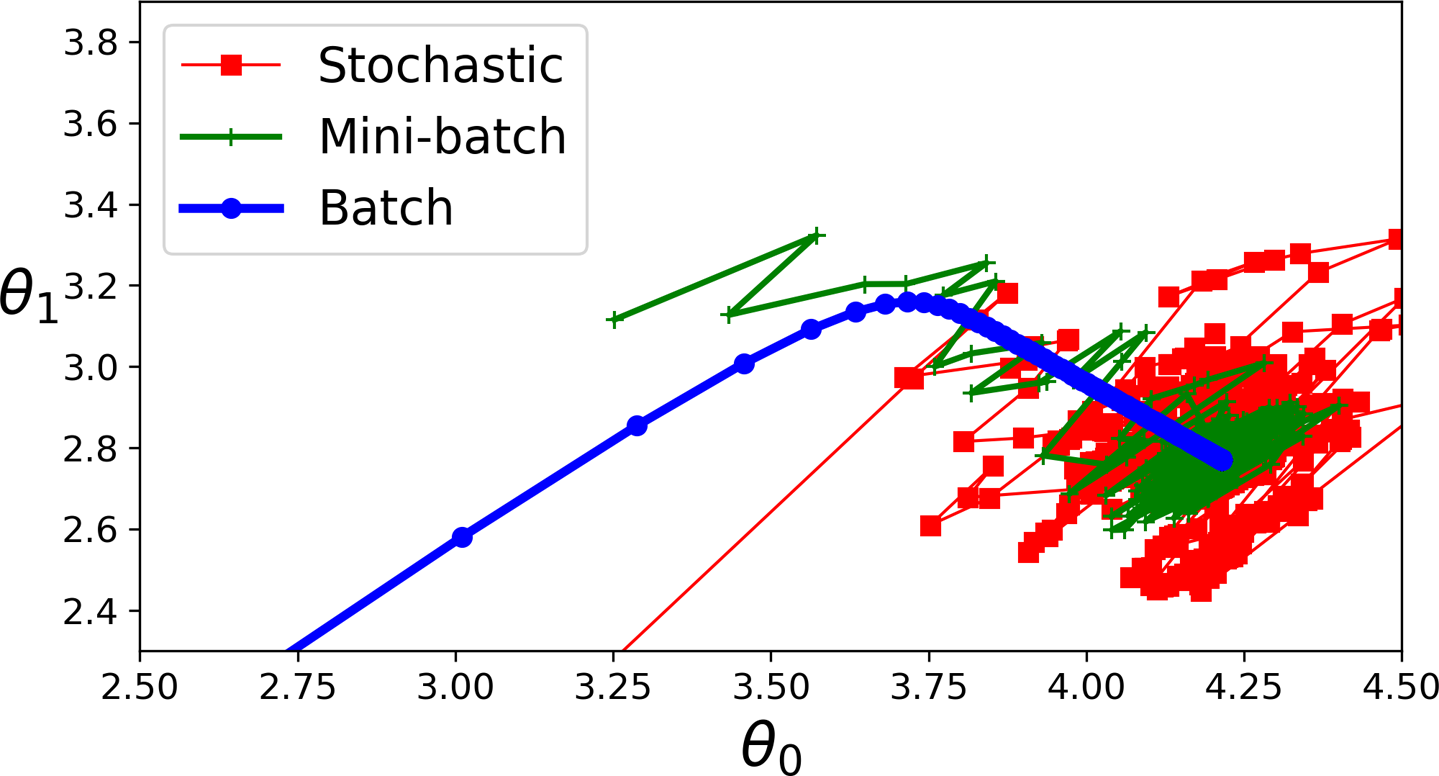